In [1]:
%matplotlib inline
from pycalphad import Database, binplot
import pycalphad.variables as v
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('fivethirtyeight')

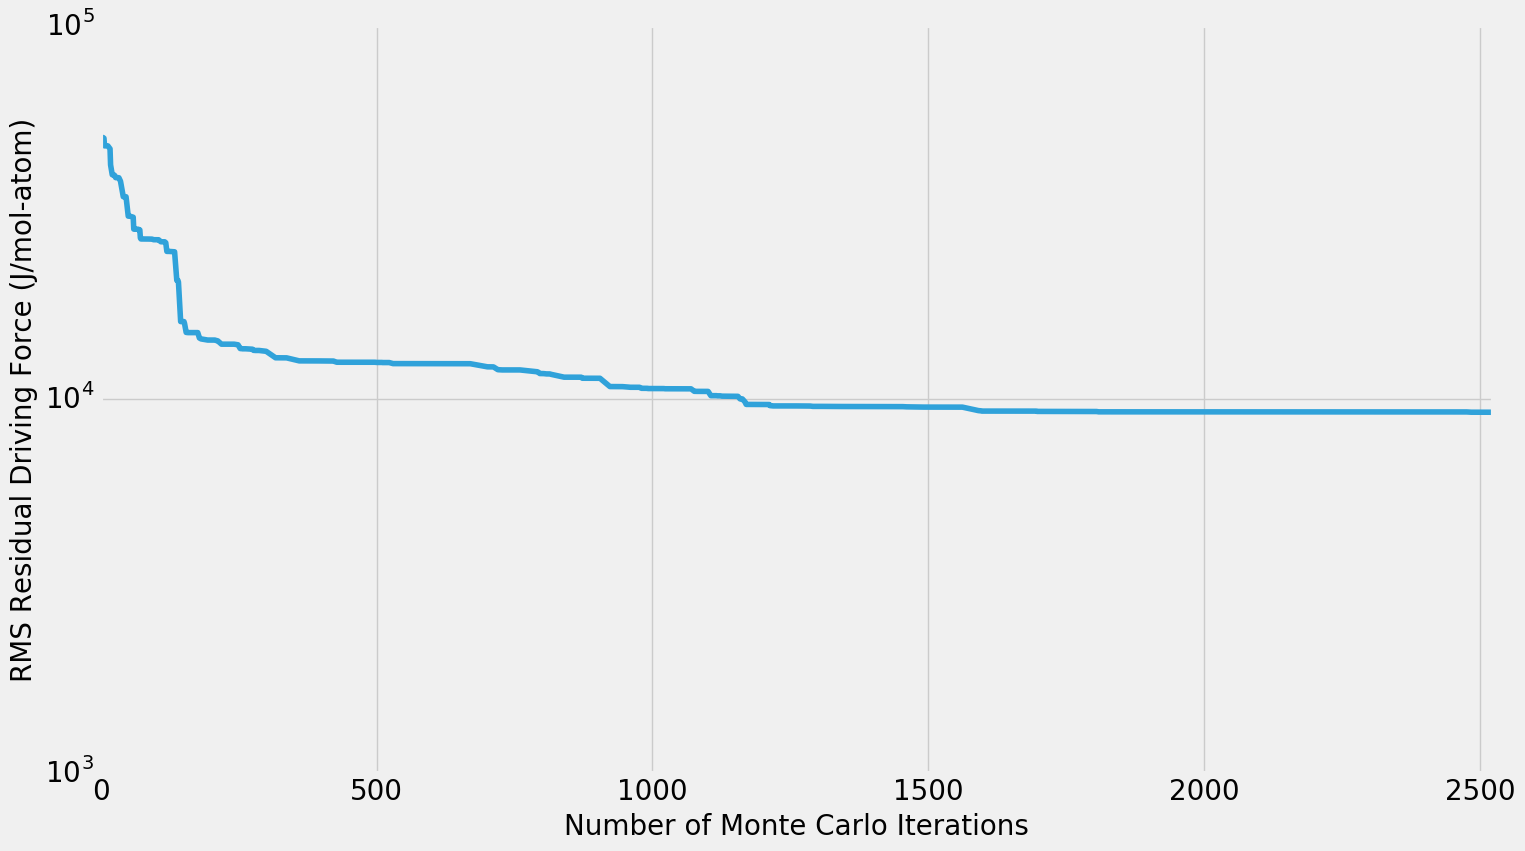

In [2]:
import pandas as pd
import numpy as np
from collections import OrderedDict
from sympy import Symbol
iterations = pd.read_csv('/home/rotis/git/pycalphad-fitting/out/alni-1494279302.csv')
progress_indices = []
progress_params = []
smallest_error = np.inf
symbols = list(map(Symbol, iterations.columns.values[2:]))
for idx, error in enumerate(np.array(iterations['error'])):
    if error < smallest_error:
        progress_indices.append(idx)
        smallest_error = error
        # skip error, time
        param_dict = OrderedDict(zip(symbols, iterations.loc[idx, iterations.columns.values[2:]]))
        progress_params.append(param_dict)
iterations['error'] = iterations['error'] ** 0.5
ax = iterations['error'][progress_indices].plot(logy=True, figsize=(16,9), fontsize=20)
ax.set_xlabel('Number of Monte Carlo Iterations', fontsize=20)
ax.set_ylabel('RMS Residual Driving Force (J/mol-atom)', fontsize=20)

In [3]:
from paramselect import load_datasets, multi_plot
import os
import fnmatch
from pycalphad import Database, Model
from pycalphad.core.sympydiff_utils import build_functions

def recursive_glob(start, pattern):
    matches = []
    for root, dirnames, filenames in os.walk(start):
        for filename in fnmatch.filter(filenames, pattern):
            matches.append(os.path.join(root, filename))
    return matches

datasets = load_datasets(sorted(recursive_glob('Al-Ni', '*.json')))
dbf = Database('alni.tdb')
comps = ['AL', 'NI', 'VA']
callable_dict = {}
grad_callable_dict = {}
hess_callable_dict = {}
models = {}
for sym in symbols:
    dbf.symbols.pop(str(sym))
for name in dbf.phases.keys():
    models[name] = Model(dbf, comps, name)
    mod = models[name]
    site_fracs = mod.site_fractions
    out = models[name].energy
    if (not callable_dict.get(name, False)) or not (grad_callable_dict.get(name, False)) \
            or (not hess_callable_dict.get(name, False)):
        # Only force undefineds to zero if we're not overriding them
        undefs = list(out.atoms(Symbol) - out.atoms(v.StateVariable) - set(symbols))
        for undef in undefs:
            out = out.xreplace({undef: float(0)})
        cf, gf, hf = build_functions(out, tuple([v.P, v.T] + site_fracs), parameters=symbols)
        if callable_dict.get(name, None) is None:
            callable_dict[name] = cf
        if grad_callable_dict.get(name, None) is None:
            grad_callable_dict[name] = gf
        if hess_callable_dict.get(name, None) is None:
            hess_callable_dict[name] = hf

Failed to converge: OrderedDict([('P', array(101325.0)), ('T', array(1290.0)), ('X_NI', array(0.5400010000000001))])
Failed to converge: OrderedDict([('P', array(101325.0)), ('T', array(1530.0)), ('X_NI', array(0.900001))])
Failed to converge: OrderedDict([('P', array(101325.0)), ('T', array(810.0)), ('X_NI', array(0.8000010000000001))])
Failed to converge: OrderedDict([('P', array(101325.0)), ('T', array(840.0)), ('X_NI', array(0.8000010000000001))])
Failed to converge: OrderedDict([('P', array(101325.0)), ('T', array(1590.0)), ('X_NI', array(0.740001))])
Failed to converge: OrderedDict([('P', array(101325.0)), ('T', array(1620.0)), ('X_NI', array(0.6800010000000001))])
Failed to converge: OrderedDict([('P', array(101325.0)), ('T', array(1320.0)), ('X_NI', array(0.640001))])
Failed to converge: OrderedDict([('P', array(101325.0)), ('T', array(1650.0)), ('X_NI', array(0.600001))])
Failed to converge: OrderedDict([('P', array(101325.0)), ('T', array(1290.0)), ('X_NI', array(0.580001))])

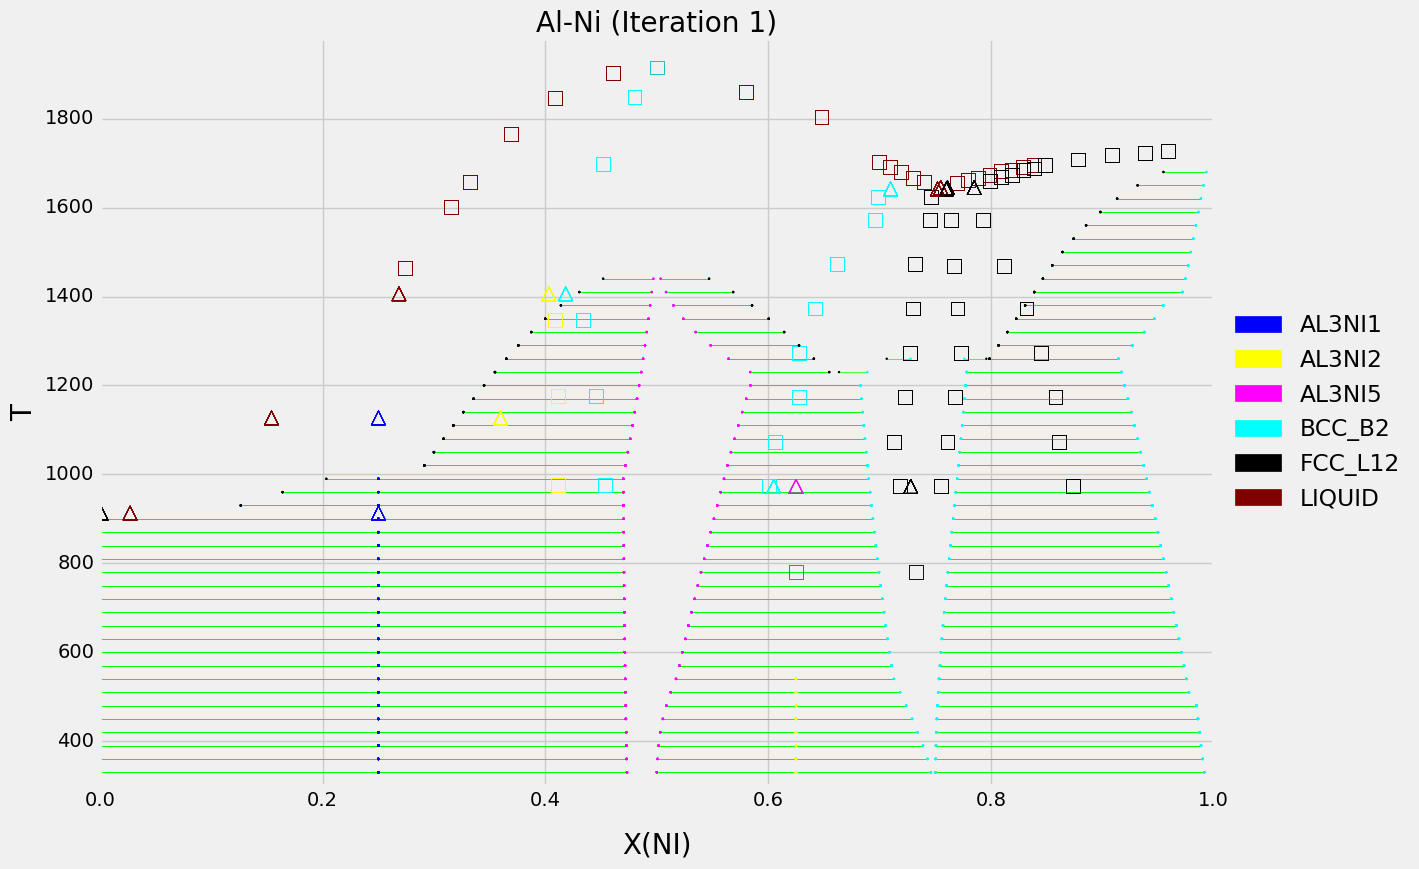

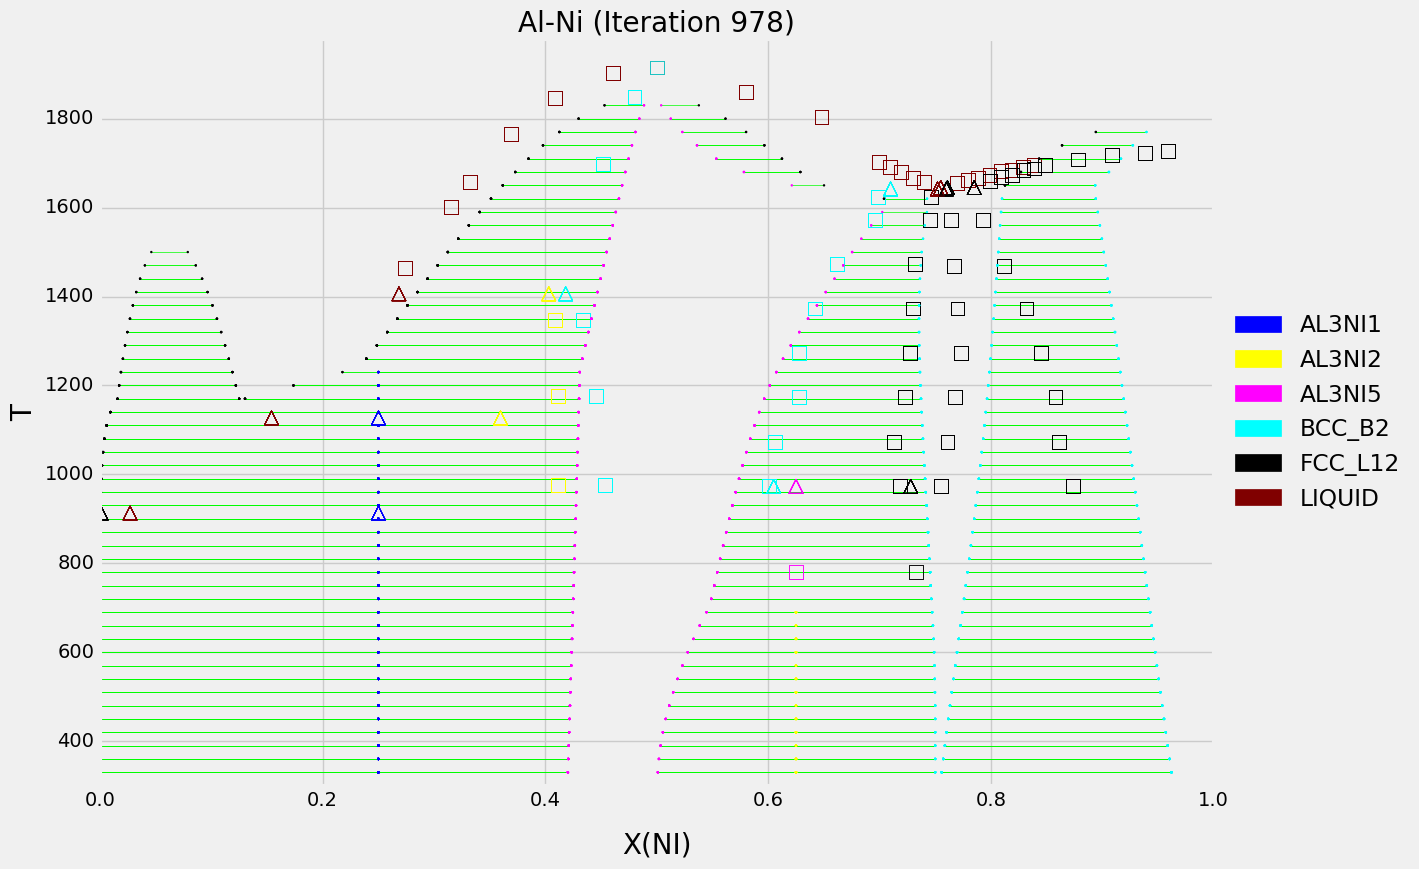

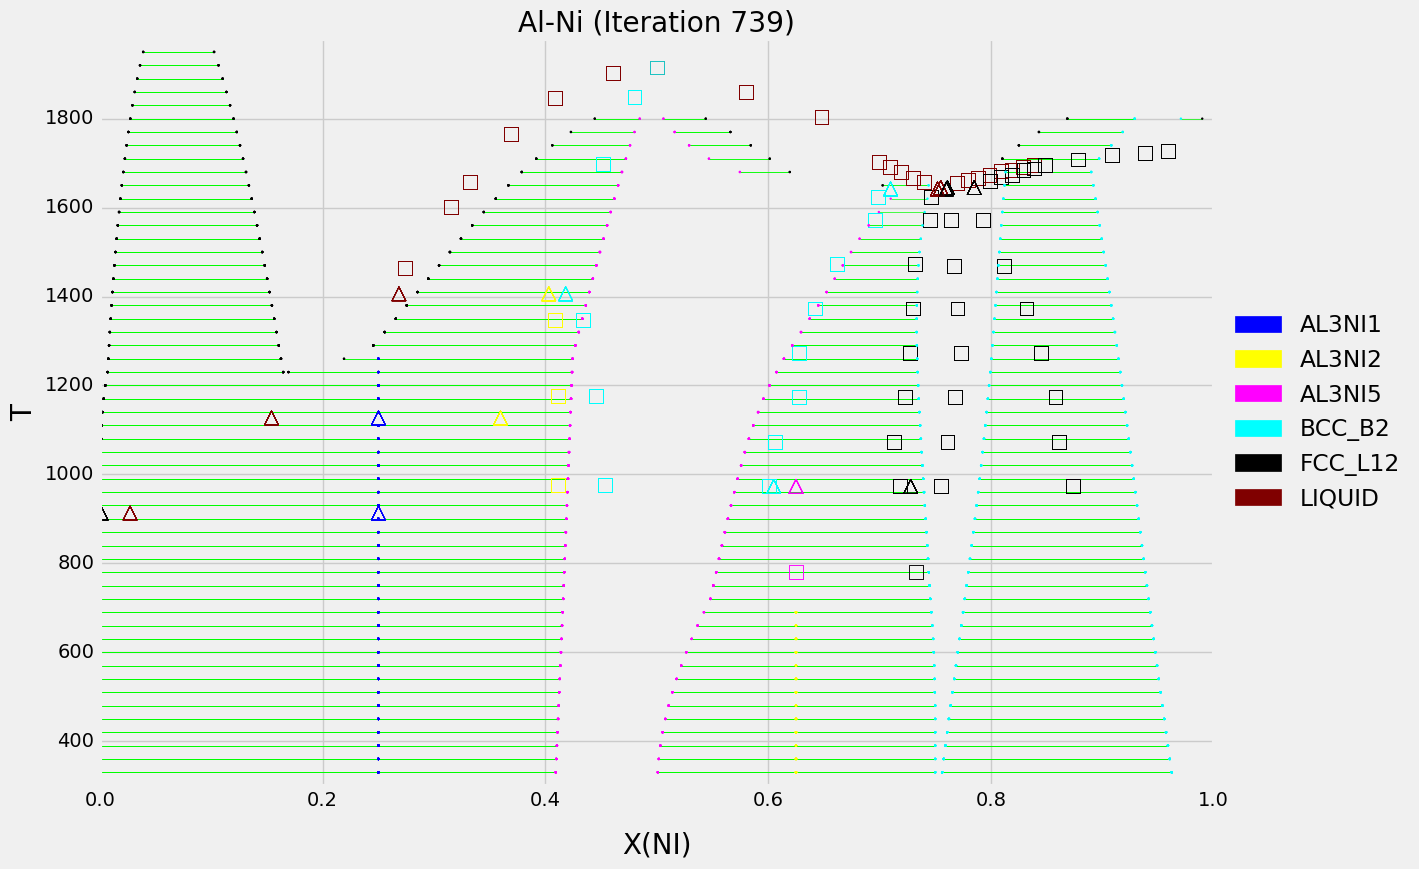

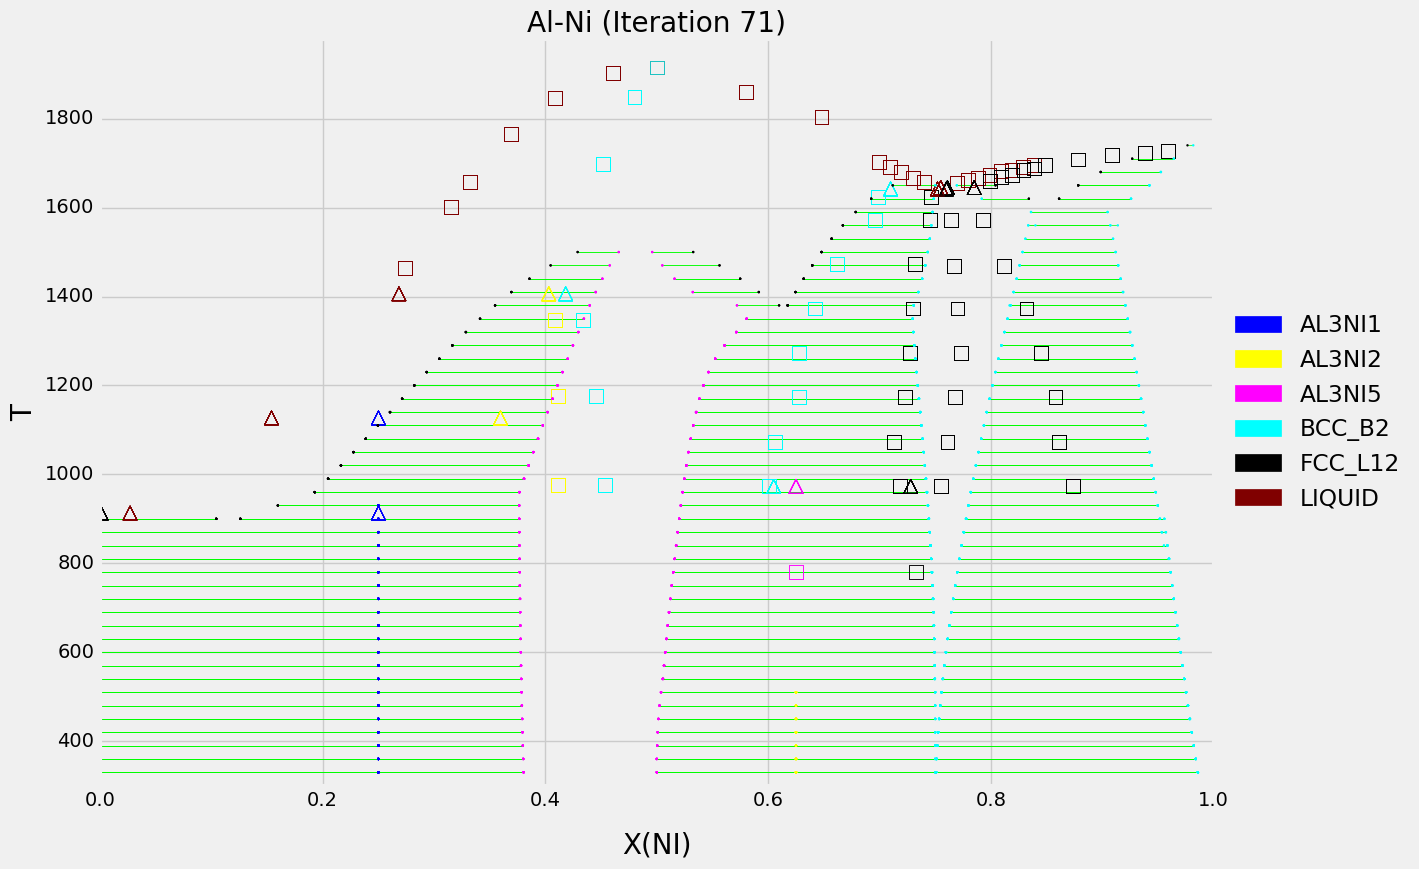

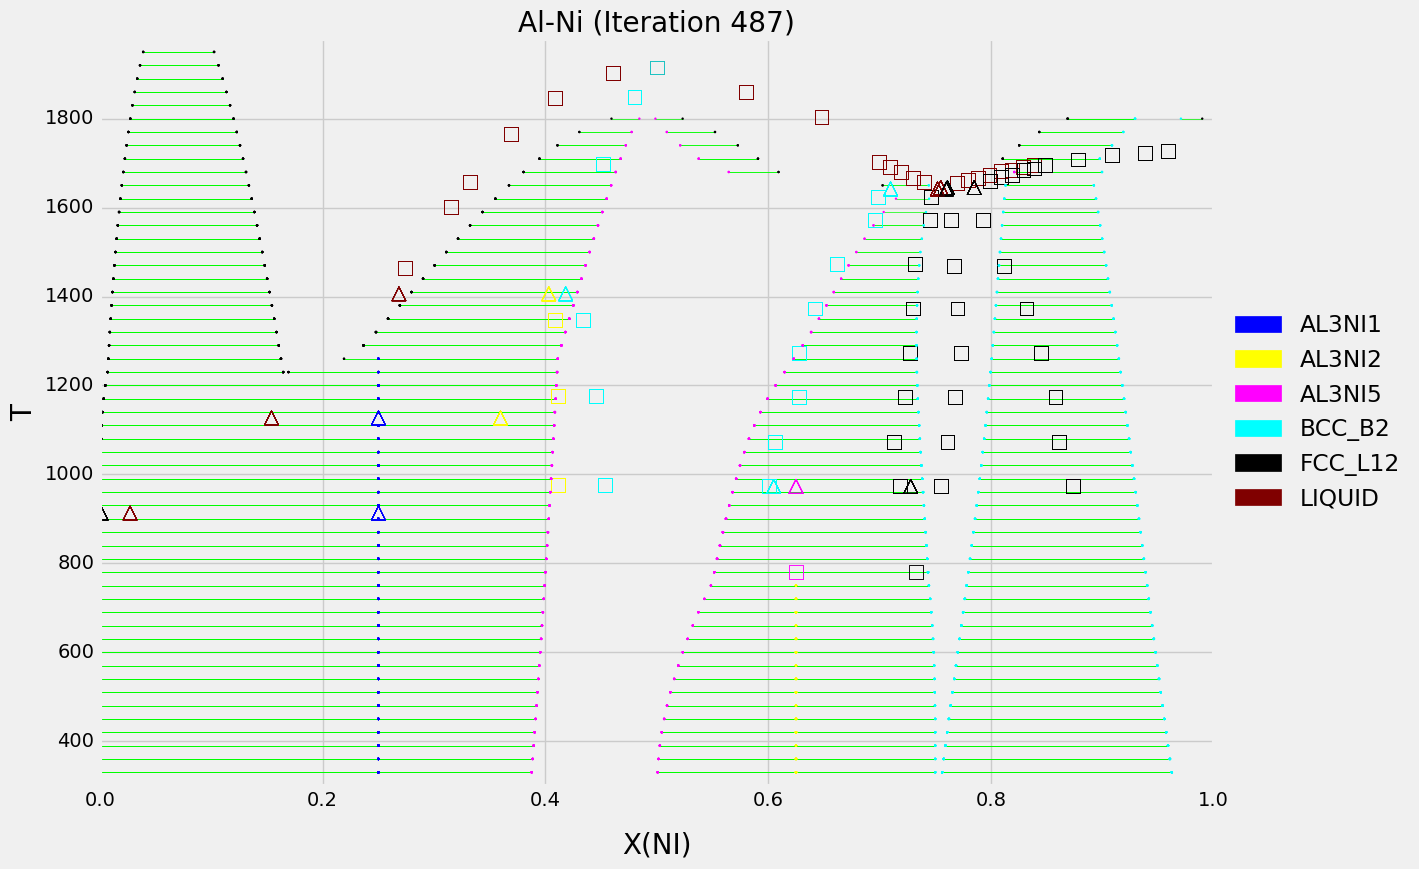

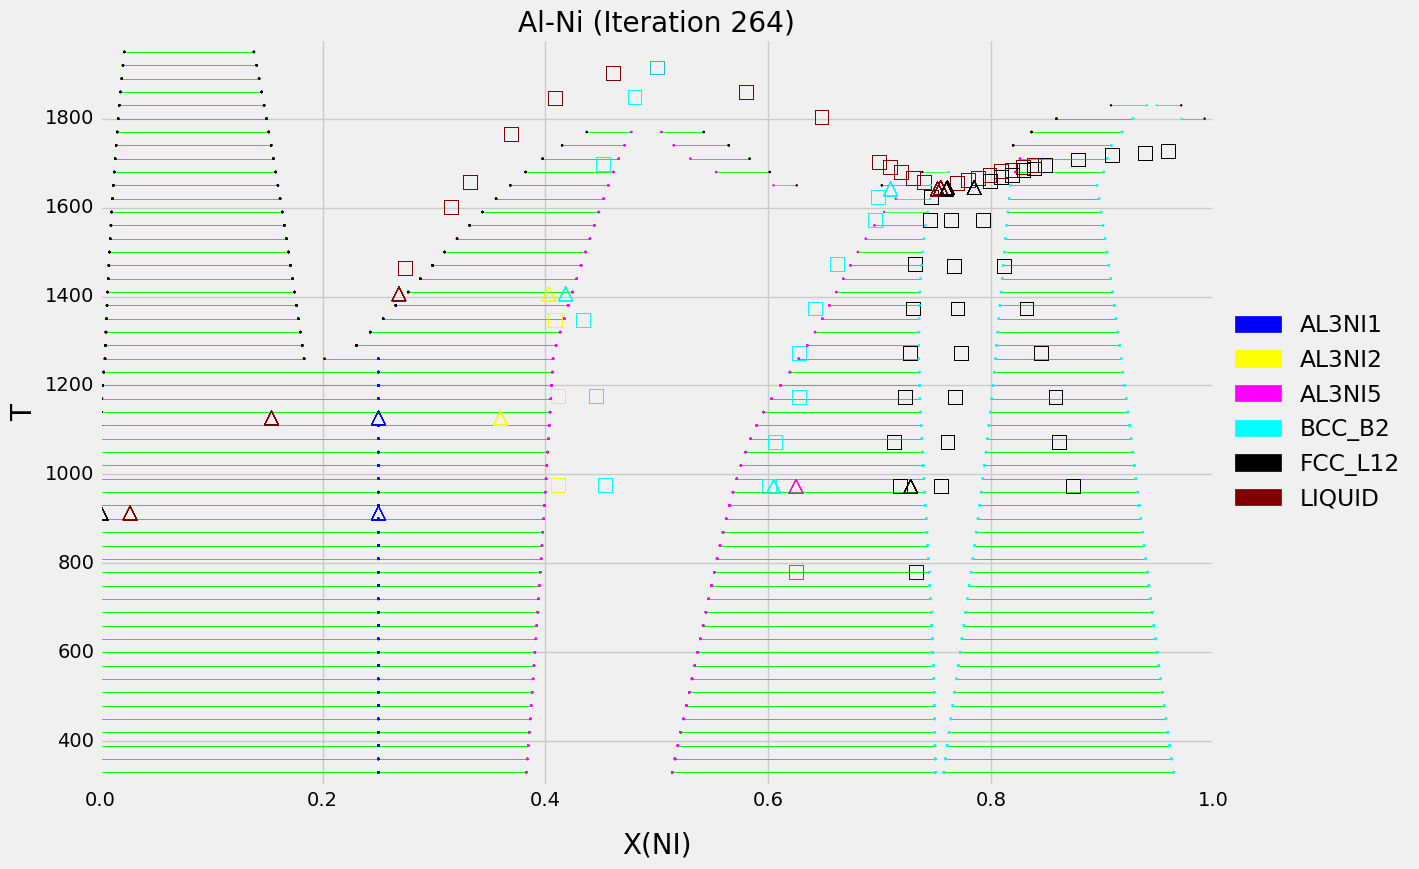

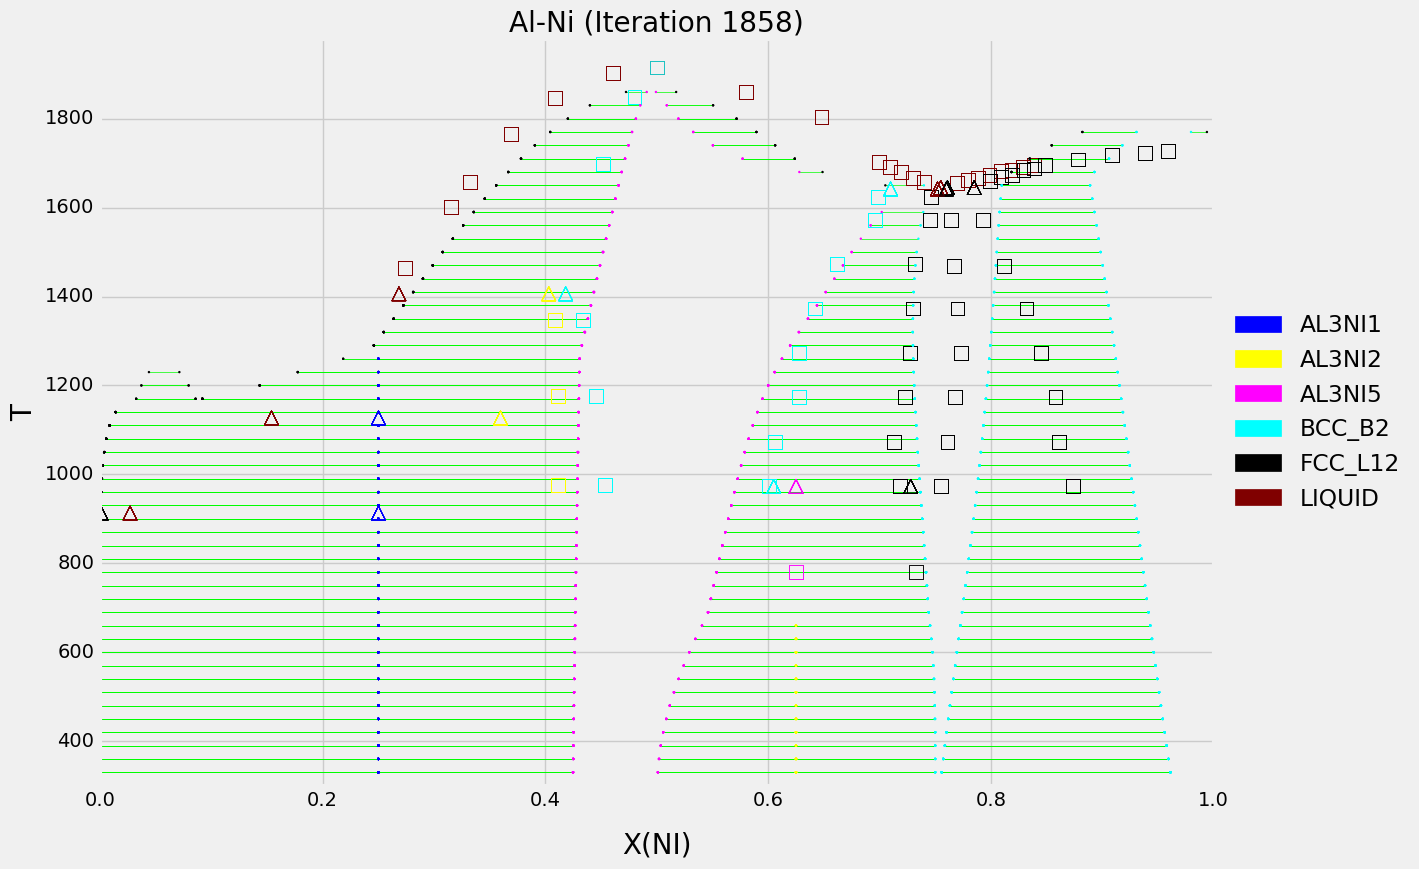

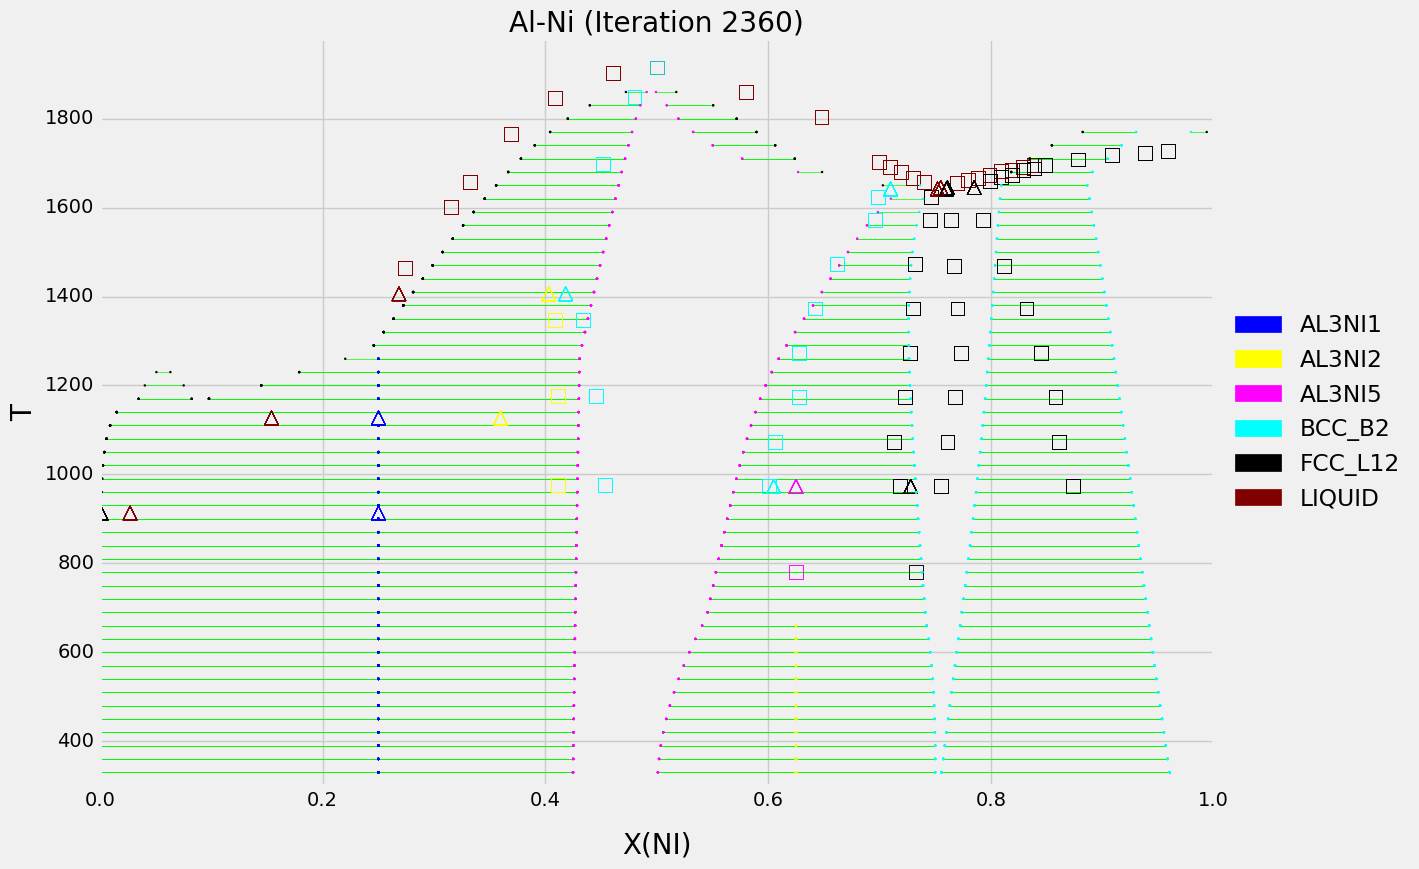

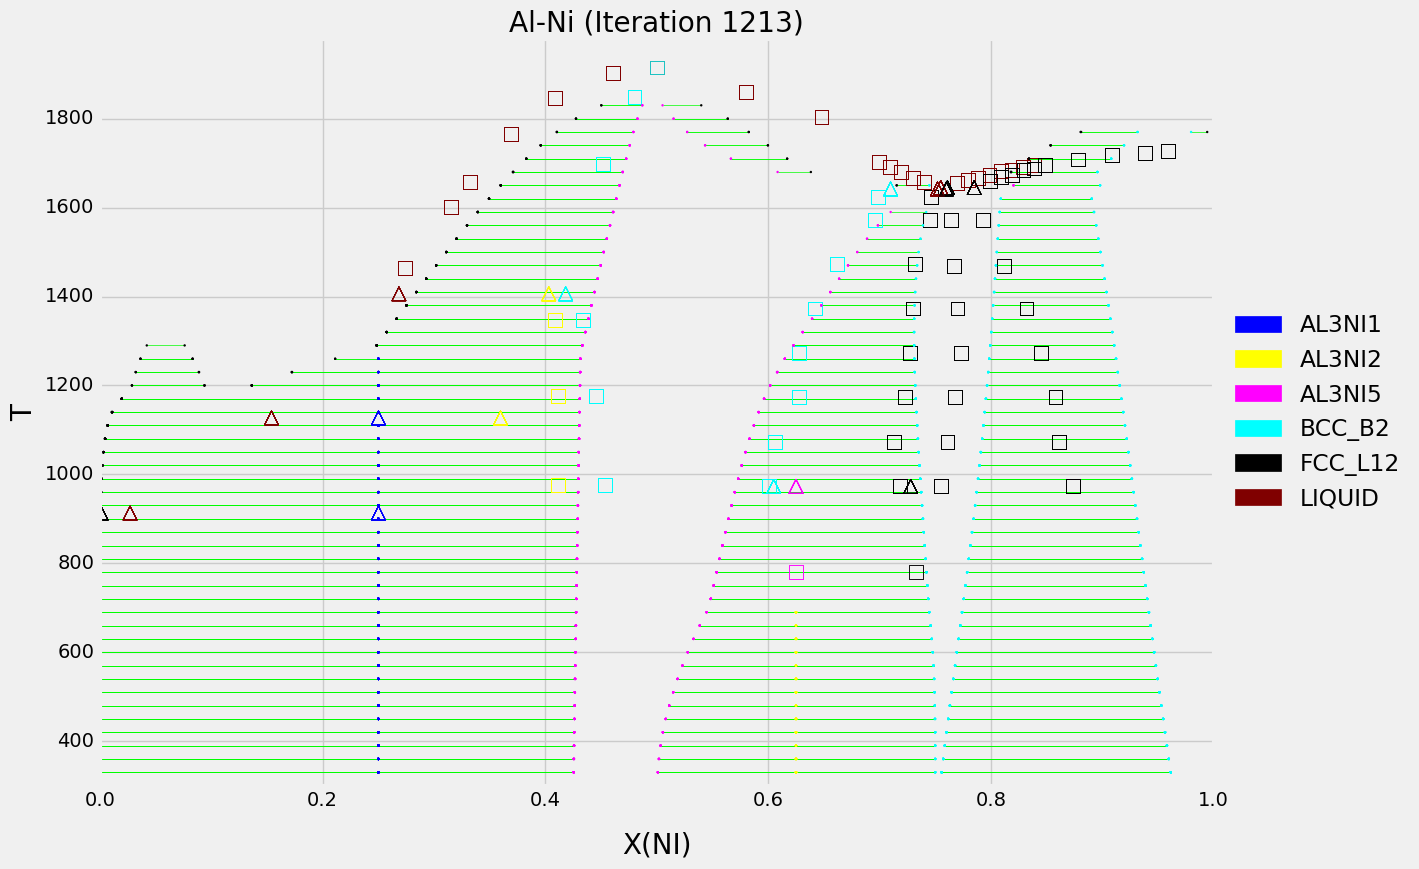

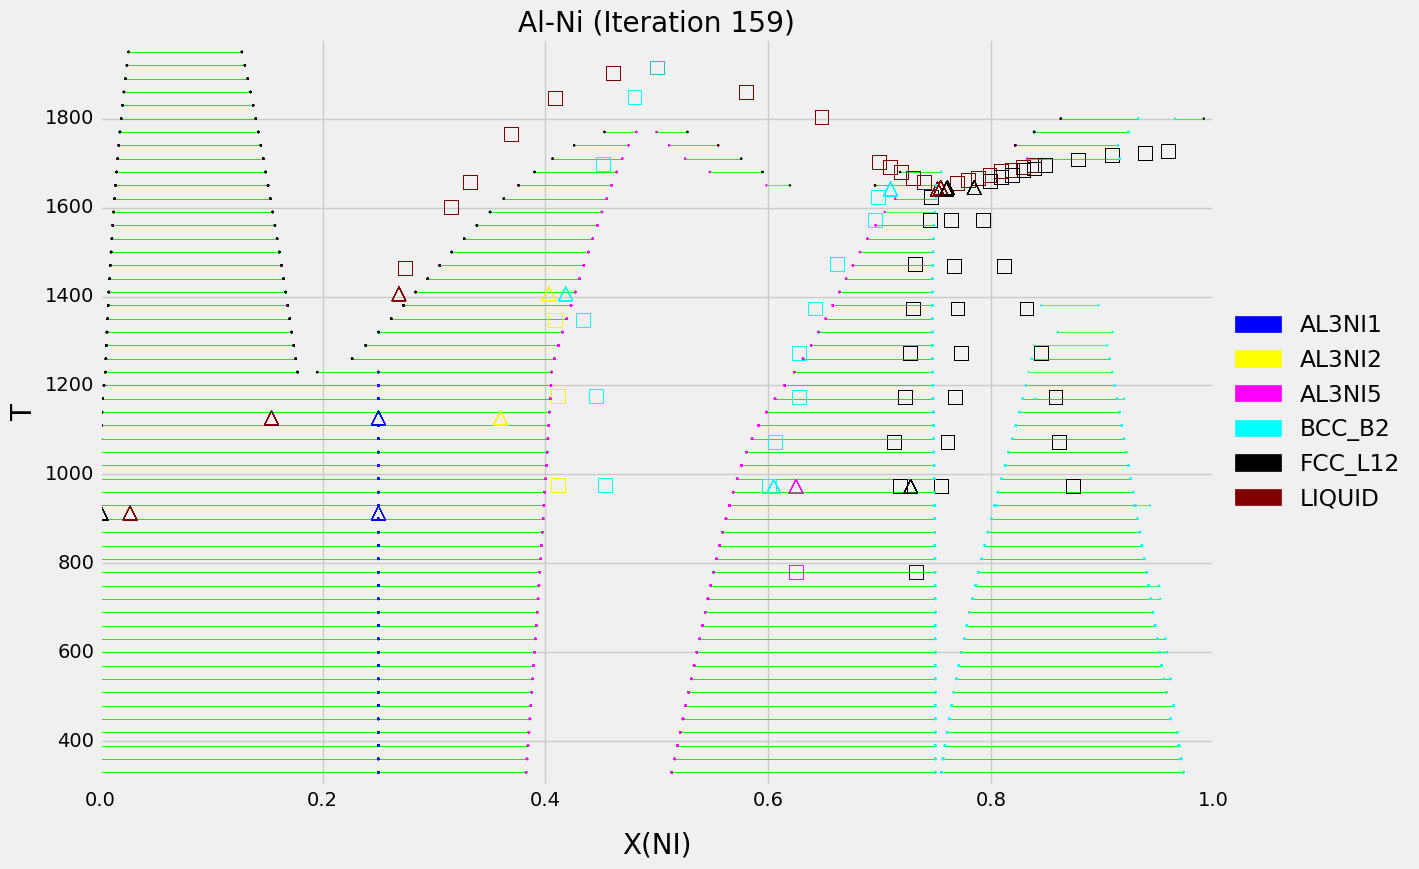

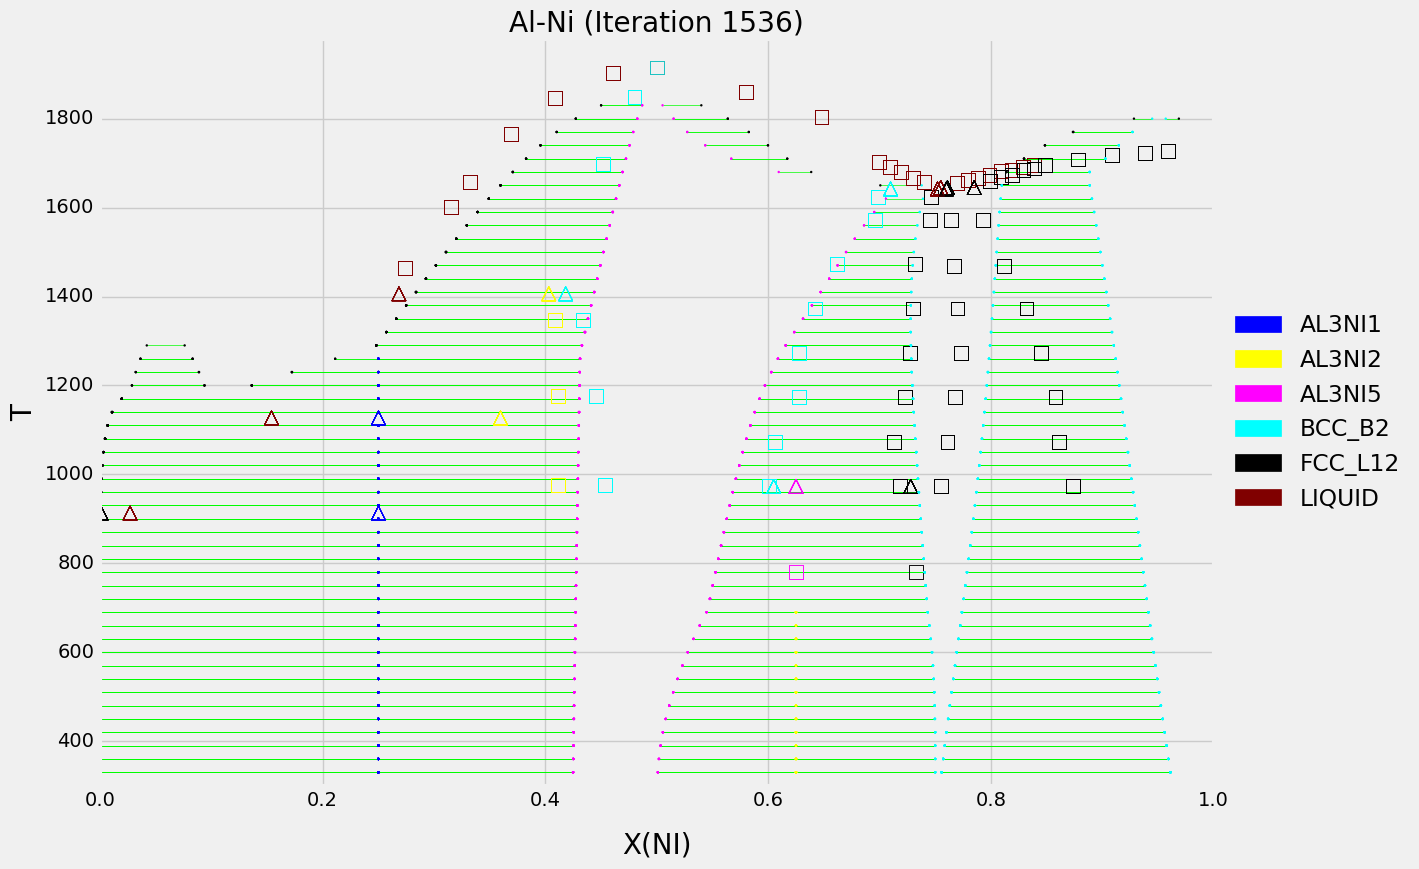

In [9]:
for idx, param_dict in zip(progress_indices[::30], progress_params[::30]):
    fig = plt.figure(idx, figsize=(16,9))
    try:
        binplot(dbf, ['AL', 'NI', 'VA'], sorted(set(dbf.phases.keys()) - {'AL3NI2'}),
                {v.P: 101325, v.T: (300, 2000, 30), v.X('NI'): (1e-6,1,0.02)}, ax=fig.gca(),
                eq_kwargs={'parameters': param_dict, 'model': models,
                           'callables': callable_dict, 'grad_callables': grad_callable_dict,
                           'hess_callables': hess_callable_dict})
    except ValueError as e:
        print(e)
    multi_plot(dbf, ['AL', 'NI', 'VA'], sorted(dbf.phases.keys()), datasets, ax=fig.gca())
    fig.gca().set_title('Al-Ni (Iteration {})'.format(idx+1))
    #fig.savefig('alni.png'.format(i), dpi=fig.dpi)

In [12]:
(iterations.loc[2499, iterations.columns.values[2:]] - iterations.loc[0, iterations.columns.values[2:]]) / iterations.loc[0, iterations.columns.values[2:]]

VV0000    0.056611
VV0001   -0.460025
VV0002   -0.499571
VV0003    0.455866
VV0004    0.484096
VV0005   -0.483390
VV0006    0.060465
VV0007   -0.485216
VV0008   -0.000000
VV0009   -0.392375
VV0010    0.481723
VV0011    0.470260
VV0012   -0.420438
VV0013   -0.289624
VV0014    0.272571
VV0015   -0.453779
VV0016   -0.493698
VV0017    0.472888
VV0018   -0.472065
VV0019   -0.469990
VV0020   -0.498913
VV0021    0.452358
VV0022    0.041904
VV0023   -0.452785
VV0024    0.070271
VV0025   -0.361571
VV0026   -0.367982
VV0027   -0.482325
VV0028   -0.482297
VV0029   -0.448433
            ...   
VV0037   -0.356805
VV0038   -0.498909
VV0039   -0.387152
VV0040   -0.217628
VV0041    0.236664
VV0042   -0.308239
VV0043   -0.031771
VV0044   -0.459320
VV0045   -0.000000
VV0046   -0.280593
VV0047    0.495516
VV0048   -0.000162
VV0049   -0.094328
VV0050    0.358774
VV0051    0.461717
VV0052   -0.023926
VV0053   -0.267791
VV0054    0.390248
VV0055    0.427317
VV0056   -0.017584
VV0057    0.171239
VV0058    0.